In [8]:
import json
import boto3
import random

prompt = "A beautiful sunset over the ocean with a clear sky"
seed = random.randint(0, 4294967295)
client = boto3.client(service_name='bedrock-runtime')

request = json.dumps(
    {
        "text_prompts": [
            {
                "text": prompt
            }
        ],
        "cfg_scale": 10,
        "seed": seed,
        "steps": 50,
        "samples" : 1,
        "style_preset" : "photographic"
    }
)

response = client.invoke_model(
    modelId="stability.stable-diffusion-xl-v1", body=request
)

response_body = json.loads(response["body"].read())
base64_image_data = response_body["artifacts"][0]['base64']

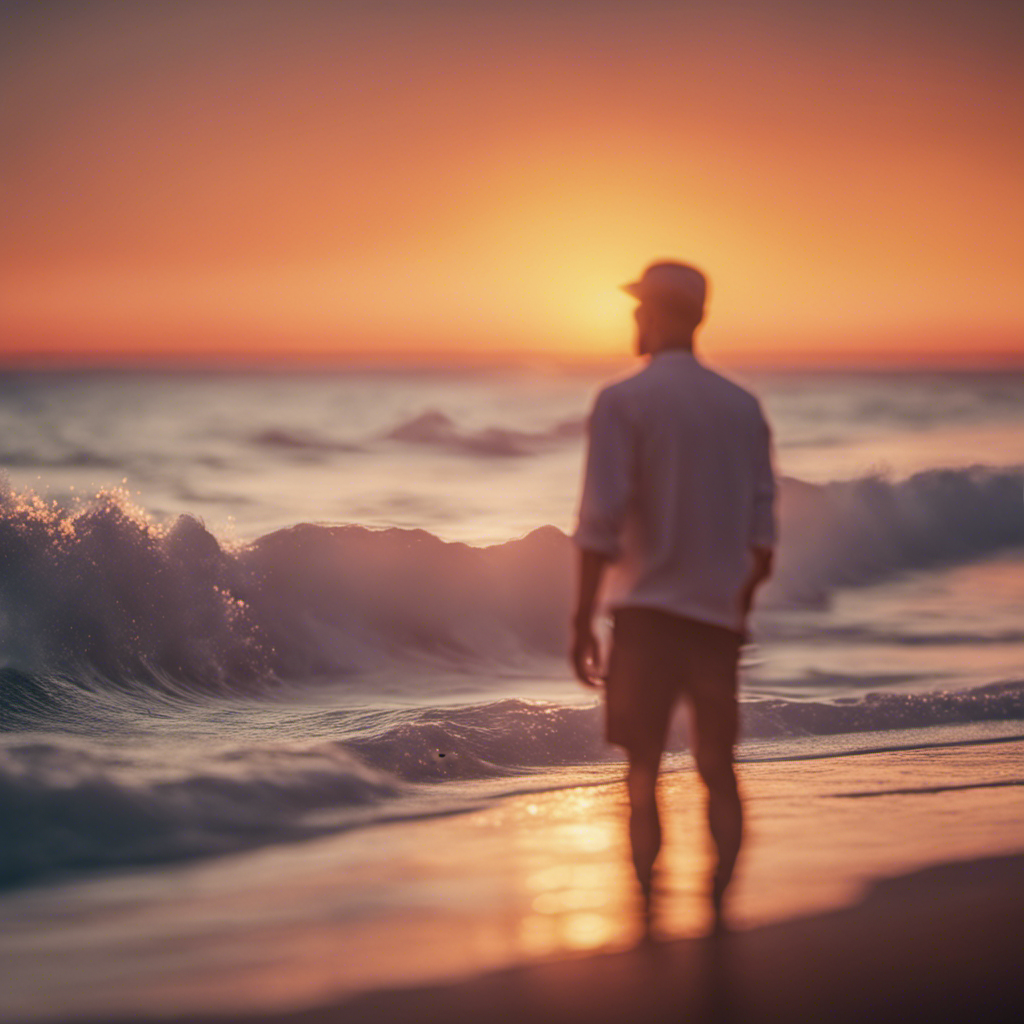

In [9]:
import base64
from io import BytesIO
from PIL import Image

img_raw = base64.b64decode(base64_image_data)
img = Image.open(BytesIO(img_raw))
display(img)